In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns


**k_means clustering**

In [ ]:
inertia = []
k_range = range(1 , 11)

for k in k_range :
  kmeans = KMeans(n_clusters = k , random_state =42)
  kmeans.fit(data_final_scaled)
  inertia.append(kmeans.inertia_)


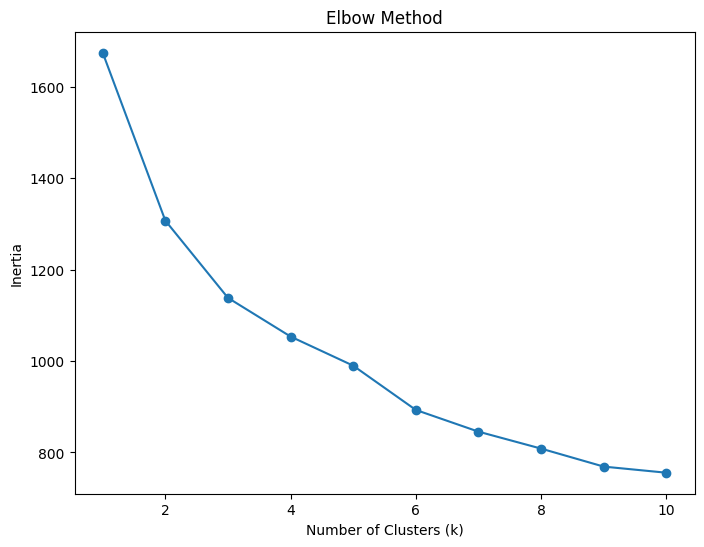

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(k_range , inertia , marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5 ,random_state=42)
kmeans_labels = kmeans.fit_predict(data_final_scaled)
data_final_scaled["kmeans_cluster"] = kmeans_labels



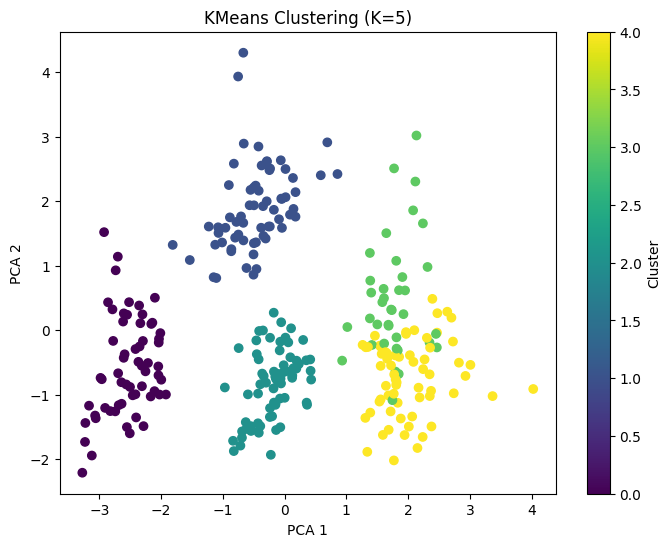

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_final_scaled)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_labels, cmap="viridis")
plt.title("KMeans Clustering (K=5)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


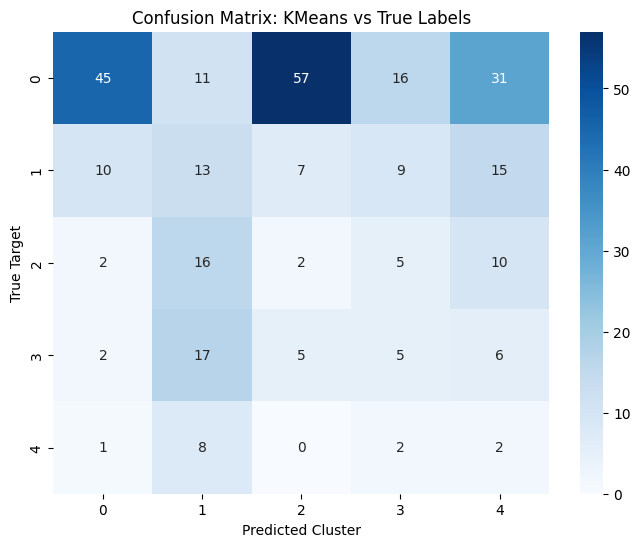

In [ ]:
conf_mat = confusion_matrix(data['target'], data_final_scaled['kmeans_cluster'])

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(kmeans_labels), yticklabels=np.unique(data['target']))
plt.xlabel("Predicted Cluster")
plt.ylabel("True Target")
plt.title("Confusion Matrix: KMeans vs True Labels")
plt.show()

**Hierarchical Clustering**

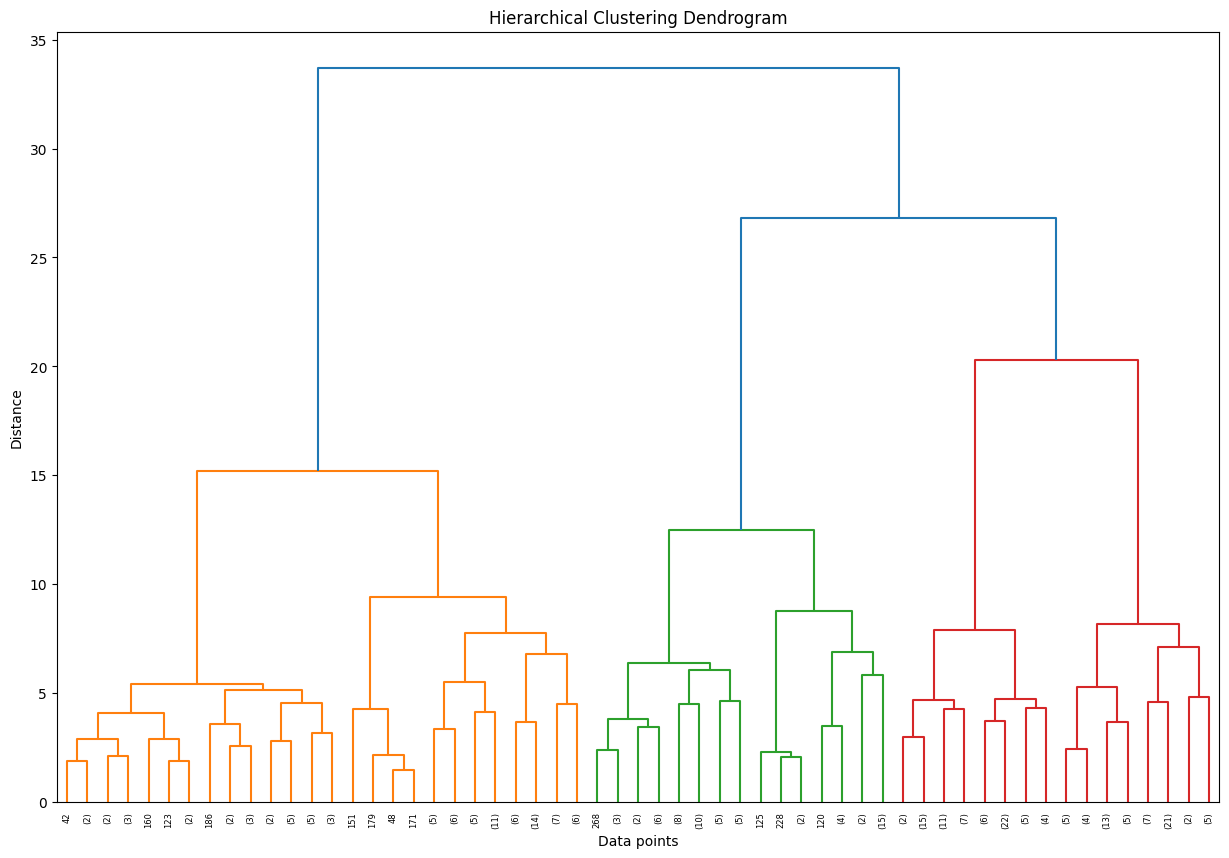

In [ ]:
z = linkage(data_final_scaled , method='ward')

plt.figure(figsize=(15 ,10))
dendrogram(z , truncate_mode='level' , p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [ ]:
hc_labels = fcluster(z , t=5 , criterion='maxclust')
data_final_scaled["hc_cluster"] = hc_labels

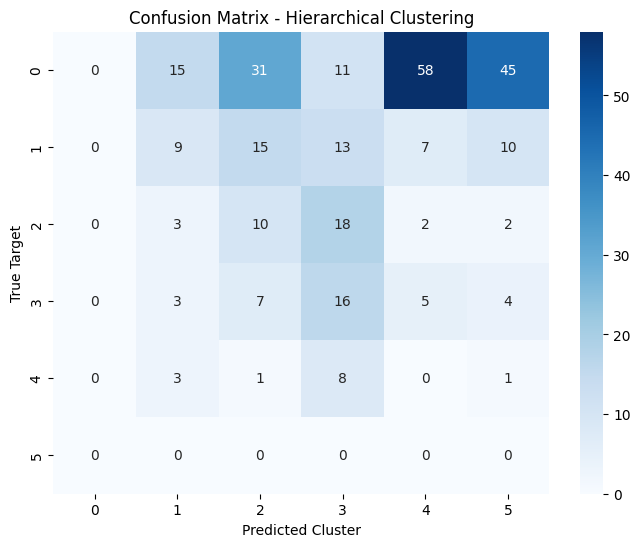

In [ ]:
conf_mat_hc = confusion_matrix(data['target'], data_final_scaled['hc_cluster'])

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_hc, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Cluster")
plt.ylabel("True Target")
plt.title("Confusion Matrix - Hierarchical Clustering")
plt.show()
